In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Change directory
os.chdir('drive/MyDrive/ic3/TII2Q')
os.getcwd()

'/content/drive/MyDrive/ic3/TII2Q'

# Carregar arquivos
Carregue arquivos das medidas neste notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
from datetime import datetime,timedelta
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [4]:
def damped_cos(t, offset, amp, tau, period, phase):
    return offset + amp * np.exp(-t / tau) * np.cos(2 * np.pi / period * t + phase)


def exp_decay(t, offset, tau, amp):
    return offset + amp * np.exp(-t / tau)


def fit(Durat, Mag, func, p0):
    # data graph
    #fig = go.Figure(go.Scatter(x=Durat, y=Mag, mode="lines+markers", name="Data"))
    plt.scatter(Durat,Mag,label="Data")
    try:  # atempts to fit the curve
        popt, pcov = curve_fit(
            func,
            Durat,
            Mag,
            p0=p0,
        )

    except Exception as e:
        print("Fit failed")
        print(e)
        empty = [np.nan] * len(func.__code__.co_varnames)
        popt, perr = (empty, empty)
    else:
        perr = np.sqrt(np.diag(pcov))
        t = np.linspace(Durat[0], Durat[-1], len(Durat) * 10)
        y = func(t, *popt)
        plt.plot(t,y,label="Fit",color="red")
        #fig = fig.add_trace(go.Scatter(x=t, y=y, mode="lines", name="Fit"))

    #fig.update_layout(height=600, width=700)
    dic_popt = {name: value for name, value in zip(func.__code__.co_varnames[1:], popt)}
    dic_perr = {name: value for name, value in zip(func.__code__.co_varnames[1:], perr)}

    #return fig, dic_popt, dic_perr
    return dic_popt, dic_perr

    data = np.load('PowerSweep_Q3TII__2024_10_02__15_14_28.npz')
    attenuations = data['Att']
    freqs = data['Freq']
    mags = data['Mag']
    phases = data['Phase']


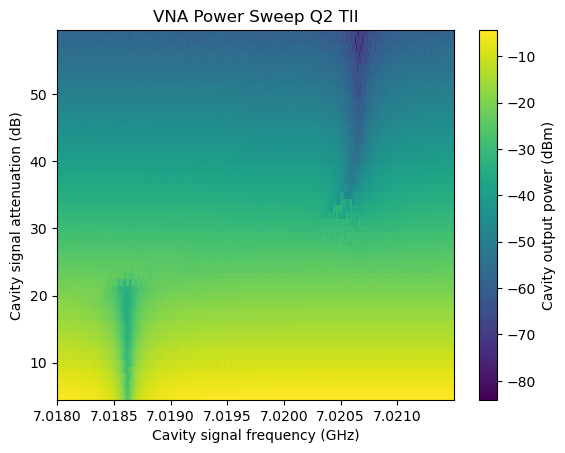

In [ ]:
dados = np.load("PowerSweep_Q2TII__2024_10_02__15_14_28.npz")
print(dados)
print(dados["header"].item())
dados["header"]
attenuations = dados["Att"]
Freq = dados["Freq"]
mags = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Cavity signal frequency (GHz)")
plt.ylabel("Cavity signal attenuation (dB)")
plt.title("VNA Power Sweep Q2 TII")

plt.pcolor(Freq/1e9, attenuations, mags)
plt.colorbar(label="Cavity output power (dBm)")

['header', 'Att', 'Freq', 'Mag', 'Phase']


Text(7.01863, -30.4685730722, '$Res_{cav}=7.0186GHz$')

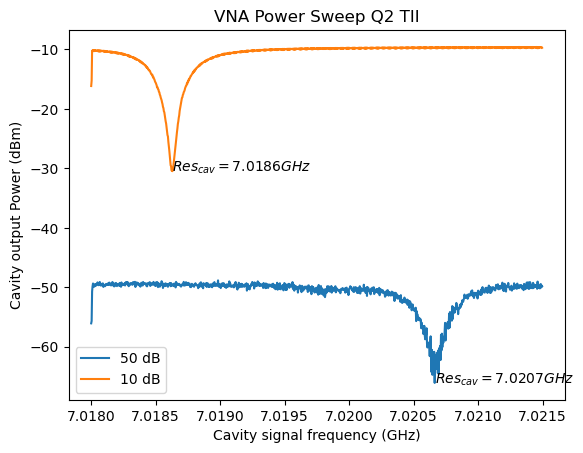

In [ ]:
dados = np.load("PowerSweep_Q2TII__2024_10_02__15_14_28.npz")
print(list(dados.keys()))
Att = dados["Att"]
Freq = dados["Freq"]
Mag = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Cavity signal frequency (GHz)")
plt.ylabel("Cavity output Power (dBm)")
plt.title("VNA Power Sweep Q2 TII")
plt.plot(Freq/1e9,Mag[45],label="50 dB")
plt.plot(Freq/1e9,Mag[5],label="10 dB")
plt.legend()
pks50=find_peaks(-Mag[45],distance=2000)[0][0]
plt.annotate(f"$Res_{{cav}}={Freq[pks50]/1e9:.5f}GHz$",(Freq[pks50]/1e9,Mag[45][pks50]))
pks10=find_peaks(-Mag[5],distance=2000)[0][0]
plt.annotate(f"$Res_{{cav}}={Freq[pks10]/1e9:.5f}GHz$",(Freq[pks10]/1e9,Mag[5][pks10]))

Text(4.454, -50.5511626766, '$\\omega_{01}=4.4540GHz$')

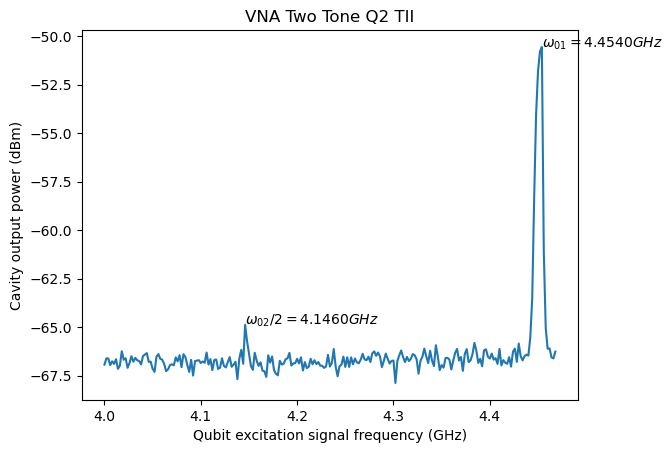

In [ ]:
dados=np.load("TWOTONE_SWEEP_Q2TII__2024_10_03__12_18_42.npz")
list(dados.keys())
Freq=dados["Freq"]
Mag = dados['Mag']
pks=find_peaks(Mag,distance=100)
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("VNA Two Tone Q2 TII")
plt.plot(Freq/1e9, Mag)
plt.annotate(f"$\\omega_{{02}}/2={Freq[pks[0][0]]/1e9:.4f}GHz$",(Freq[pks[0][0]]/1e9,Mag[pks[0][0]]))
plt.annotate(f"$\\omega_{{01}}={Freq[pks[0][1]]/1e9:.4f}GHz$",(Freq[pks[0][1]]/1e9,Mag[pks[0][1]]))

['header', 'Amp', 'Freq', 'Mag', 'Phase']


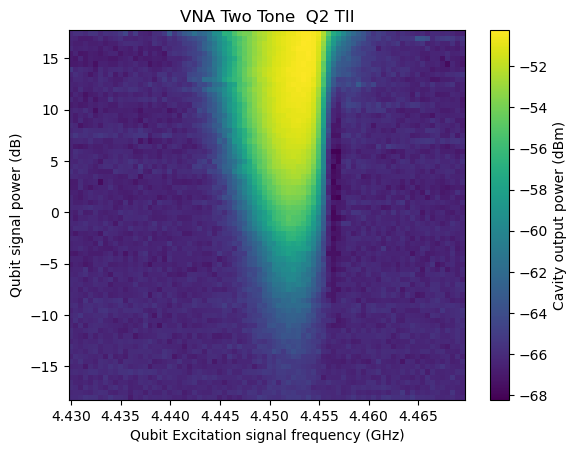

In [ ]:
dados = np.load("TWOTONE_MAP_Q2TII_2024_10_03__10_56_49.npz")
print(list(dados.keys()))
Amp=dados["Amp"]
Freq = dados["Freq"]
mags = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Qubit Excitation signal frequency (GHz)")
plt.ylabel("Qubit signal power (dB)")
plt.title("VNA Two Tone  Q2 TII")

plt.pcolor(Freq/1e9, Amp, mags)
plt.colorbar(label="Cavity output power (dBm)")

['header', 'Amp', 'Freq', 'Mag', 'Phase']


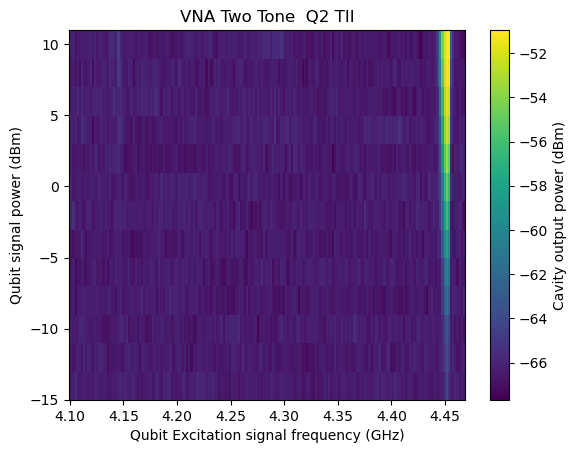

In [ ]:
dados = np.load("TWOTONE_MAP_Q2TII_2024_10_03__12_26_56.npz")
print(list(dados.keys()))
Amp=dados["Amp"]
Freq = dados["Freq"]
mags = dados["Mag"]
phases = dados["Phase"]
plt.xlabel("Qubit Excitation signal frequency (GHz)")
plt.ylabel("Qubit signal power (dBm)")
plt.title("VNA Two Tone  Q2 TII")

plt.pcolor(Freq/1e9, Amp, mags)
plt.colorbar(label="Cavity output power (dBm)")

## PULSADO

['header', 'Att', 'Freq', 'Mag', 'Phase']


Text(7.020800000000003, -148.9938435722362, 'Res=7.0208 GHz')

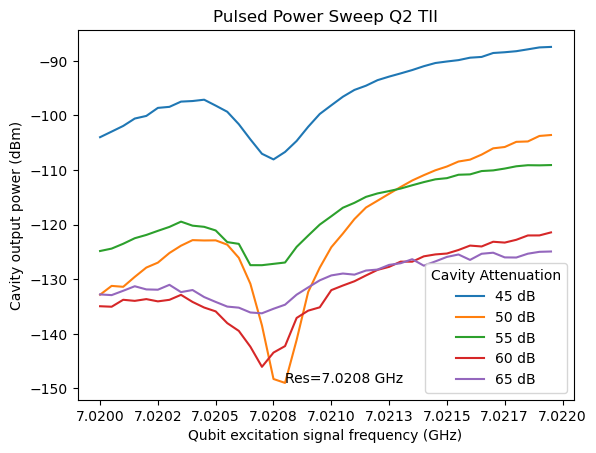

In [ ]:
dados=np.load("PowerSweep_2QTII__2024_10_04__15_59_17.npz")
print(list(dados.keys()))
Freq=dados["Freq"]
Mag = dados['Mag']
Att=dados["Att"]
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("Pulsed Power Sweep Q2 TII")
for i,att in enumerate(Att):
    plt.plot(Freq/1e9, Mag[i],label=f"{att} dB")
plt.legend(title="Cavity Attenuation")
plt.annotate(f"Res={Freq[np.argmin(Mag[1])]/1e9:.4f} GHz",(Freq[np.argmin(Mag[1])]/1e9,np.min(Mag[1])))

Text(4.4565, -119.60027347712412, '$\\omega_{01}=4.4565GHz$')

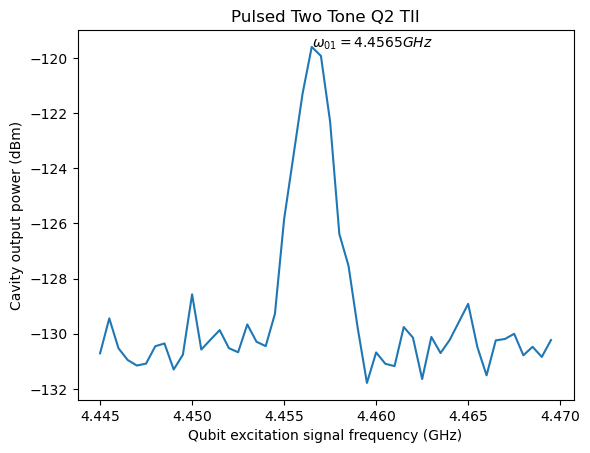

In [ ]:
dados=np.load("TWOTONE_2QTII_ExctQubit_2024_10_04__22_04_56.npz")
list(dados.keys())
Freq=dados["Freq"]
Mag = dados['Mag']
pks=find_peaks(Mag,distance=100)
plt.xlabel("Qubit excitation signal frequency (GHz)")
plt.ylabel("Cavity output power (dBm)")
plt.title("Pulsed Two Tone Q2 TII")
plt.plot(Freq/1e9, Mag)
plt.annotate(f"$\\omega_{{01}}={Freq[pks[0][0]]/1e9:.4f}GHz$",(Freq[pks[0][0]]/1e9,Mag[pks[0][0]]))


Text(7.2e-16, -128.28845265840047, '$\\pi_{\\text{pulse}}=0.720\\mu s$')

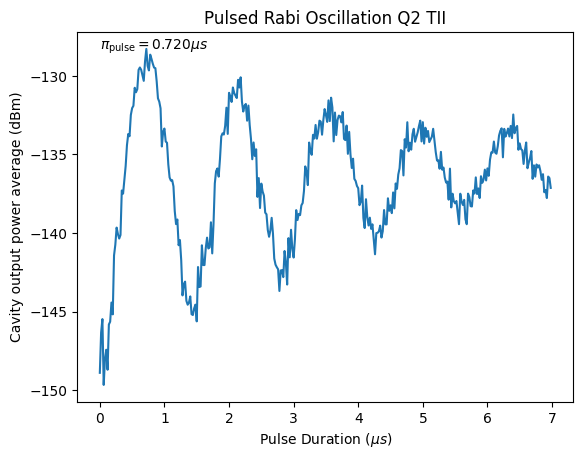

In [ ]:
dados=np.load("RABI_2QTII_ExctQubit_2024_10_04__17_08_26.npz")
list(dados.keys())
Durat=dados["Durat"]
Mag = dados['Mag']
pks=find_peaks(Mag,distance=100)
plt.xlabel("Pulse Duration ($\\mu s$)")
plt.ylabel("Cavity output power average (dBm)")
plt.title("Pulsed Rabi Oscillation Q2 TII")
plt.plot(Durat*1e6, Mag)
plt.annotate(f"$\\pi_{{\\text{{pulse}}}}={Durat[pks[0][0]]*1e6:.3f}\\mu s$",(Durat[pks[0][0]]/1e9,Mag[pks[0][0]]))


['header', 'Delay', 'Mag', 'Phase']


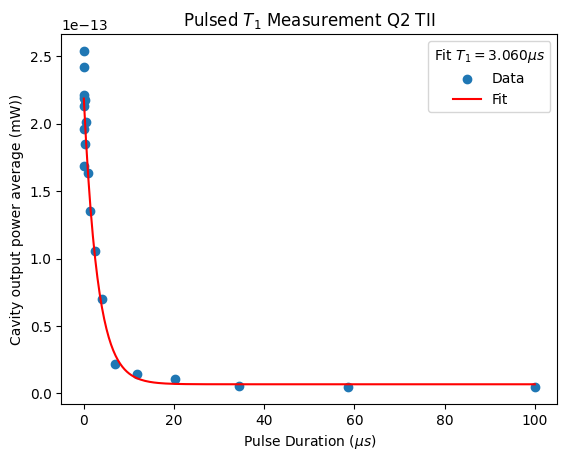

In [ ]:
dados=np.load("T1_2QTII__2024_10_04__18_39_34.npz")
print(list(dados.keys()))
Delay=dados["Delay"]
Mag = dados['Mag']
Mag=10**(Mag/10)
plt.xlabel("Pulse Duration ($\\mu s$)")
plt.ylabel("Cavity output power average (mW))")
plt.title("Pulsed $T_1$ Measurement Q2 TII")
popt,perr=fit(Delay*1e6, Mag, exp_decay, [3,40,5])
plt.legend(title=f"Fit $T_1={popt['tau']:.3f}\\mu s$")



In [ ]:
dados=np.load("T2_2QTII__2024_10_04__22_24_04.npz") #experimental errors in this measurment don't use
print(list(dados.keys()))
Delay=dados["Delay"]
Mag = dados['Mag']
plt.xlabel("Pulse Interval ($\\mu s$)")
plt.ylabel("Cavity output power average (dBm)")
plt.title("Pulsed Ramsey $T_2^*$ Measurement Q2 TII")
#def damped_cos(t, offset, amp, tau, period, phase):
popt,perr=fit(Delay*1e6, Mag, damped_cos, [-120, 6, 1, 0.1 ,0])
plt.legend(title=f"Fit $T_2^*={popt['tau']:.3f}\\mu s$")



['header', 'Delay', 'Mag', 'Phase']


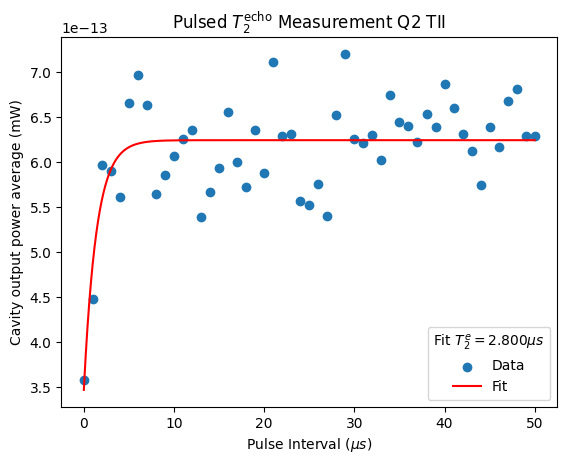

In [5]:
dados=np.load("T2e_2QTII__2024_10_04__22_57_32.npz")
print(list(dados.keys()))
Delay=dados["Delay"]
Mag = dados['Mag']
Mag=10**(Mag/10)
plt.xlabel("Pulse Interval ($\\mu s$)")
plt.ylabel("Cavity output power average (mW)")
plt.title("Pulsed $T_2^{{\\text{echo}}}$ Measurement Q2 TII")
popt,perr=fit(Delay*1e6, Mag, exp_decay, [-122,40,5])
plt.legend(title=f"Fit $T_2^e={2*popt['tau']:.3f}\\mu s$")



T1_2QTII__2024_10_04__18_39_34.npz


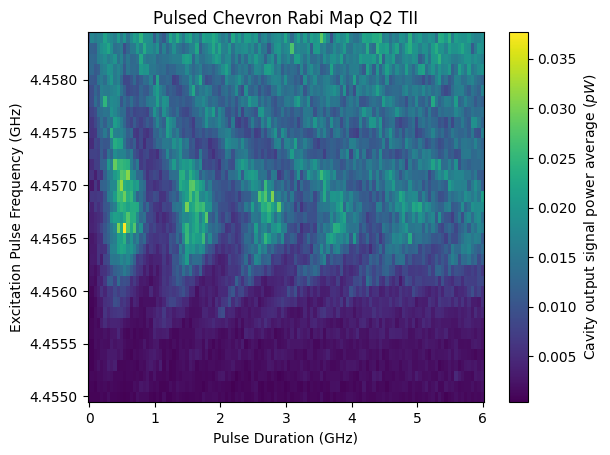

In [ ]:
dados = np.load('ChevronRabi_2QTII__2024_10_05__19_47_08.npz')
Freq=dados["Freq"]
dados["header"]
Durat = dados['Durat']
Mag = dados['Mag']
Mag = 10**(Mag/10)
Phase = dados['Phase']
#plt.plot(Durat,Mag[3,:])
plt.pcolor(Durat*1e6,Freq/1e9,Mag*1e12)
plt.xlabel("Pulse Duration (GHz)")
plt.ylabel("Excitation Pulse Frequency (GHz)")
plt.title("Pulsed Chevron Rabi Map Q2 TII")

plt.colorbar(label="Cavity output signal power average ($pW$)")
#plt.vlines(0.525e-6,-110,-130)
print('T1_2QTII__2024_10_04__18_39_34.npz')